Arshak Parsa

In [1]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sb
import matplotlib.pyplot as plt

# Task 1 (Data Preparation and Building a Base Decision Tree)

## Part A (Loading and Preprocessing)

In [2]:
df = pd.read_csv("data/dataset.csv")
df.shape

(4269, 13)

In [3]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


We should remove load_id because it does not add any information to our data.

In [5]:
df = df.drop(["loan_id"], axis=1)

There is no missing data.

In [6]:
df.columns = df.columns.to_series().apply(lambda x : x.replace(" ","")) # let's remove those annoying spaces 

In [7]:
df['loan_status'].value_counts()

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

I can say it's balanced.

In [8]:
nomvar = ["education", 'self_employed']
prep = ColumnTransformer(
    transformers=[
        # (name, pipeline_object, column_list)
        #('numeric', numerical_pipeline, [e for e in df.columns if e not in nomvar]),
        ('nominal', make_pipeline(OneHotEncoder()), nomvar)
    ],
    remainder='passthrough',  # 'drop' any columns not listed, 'passthrough' would keep them
    verbose_feature_names_out=False
)

In [9]:
# DO NOT FORGET THE EXTRA [] :))))
df["loan_status"] = OrdinalEncoder(categories=[[" Rejected", " Approved"]]).fit_transform(df[["loan_status"]])

In [10]:
print("--- Setup and Data Splitting ---")

y = df['loan_status']

X = df.drop('loan_status', axis=1)

# --- Train-Test Split ---
# This is the MOST IMPORTANT step to do FIRST.
# We use 'stratify=y' to ensure the test set has the same
# proportion of survivors as the training set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,     
    random_state=52,
    stratify=y
)

print(f"Training set shape (X): {X_train.shape}")
print(f"Testing set shape (X): {X_test.shape}")

--- Setup and Data Splitting ---
Training set shape (X): (3415, 11)
Testing set shape (X): (854, 11)


In [11]:
# let's test the prep 
X_train_prep = pd.DataFrame(
    prep.fit_transform(X_train), 
    columns=prep.get_feature_names_out(), 
    index=X_train.index
)
X_train_prep

,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
4056,1.0,0.0,0.0,1.0,2.0,7800000.0,22100000.0,6.0,533.0,11900000.0,2500000.0,19300000.0,10800000.0
3488,1.0,0.0,0.0,1.0,3.0,6300000.0,23300000.0,4.0,347.0,18300000.0,12200000.0,21100000.0,8100000.0
1659,0.0,1.0,1.0,0.0,1.0,500000.0,1700000.0,2.0,680.0,700000.0,800000.0,1400000.0,700000.0
2120,0.0,1.0,0.0,1.0,3.0,3200000.0,7200000.0,6.0,728.0,4800000.0,2000000.0,8000000.0,4600000.0
430,0.0,1.0,0.0,1.0,4.0,9300000.0,27500000.0,18.0,338.0,21500000.0,500000.0,34900000.0,6600000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,0.0,1.0,0.0,1.0,0.0,3800000.0,10600000.0,12.0,490.0,3300000.0,6500000.0,14400000.0,3100000.0
2583,1.0,0.0,0.0,1.0,4.0,5900000.0,17300000.0,20.0,657.0,1500000.0,5600000.0,13000000.0,4100000.0
2910,0.0,1.0,1.0,0.0,5.0,500000.0,1200000.0,16.0,499.0,600000.0,600000.0,1500000.0,200000.0
1993,0.0,1.0,0.0,1.0,4.0,9200000.0,28100000.0,12.0,760.0,23200000.0,9700000.0,22300000.0,12900000.0


## Part B (Training Decision Tree)

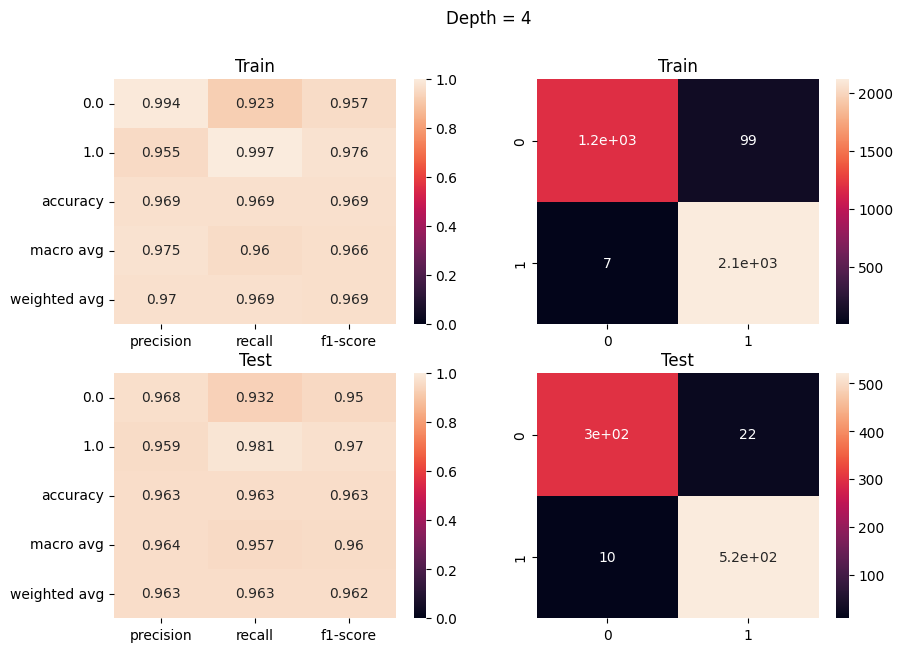

In [12]:
tree_d4 = make_pipeline(prep, DecisionTreeClassifier(max_depth=4, random_state=7)).fit(X_train,y_train)
def validate_model(m, title, vmin = 0, vmax = 1):
    def v(m,yt,yp,title,axs):
        sb.heatmap(pd.DataFrame(classification_report(yt,yp, output_dict=True)).iloc[:-1, :].T, annot=True,
                    ax=axs[0], vmin = vmin, vmax = vmax, fmt='.3g').set_title(title)
        sb.heatmap(confusion_matrix(yt, yp), annot=True,ax=axs[1]).set_title(title)
    fig, ax = plt.subplots(2,2 ,figsize=(10, 7))
    v(m,y_train,m.predict(X_train),"Train", (ax[0][0], ax[0][1]))
    v(m,y_test,m.predict(X_test),"Test", (ax[1][0], ax[1][1]))
    fig.suptitle(title)
    plt.show()
validate_model(tree_d4,"Depth = 4")

Looks like Decision Tree performs pretty well!

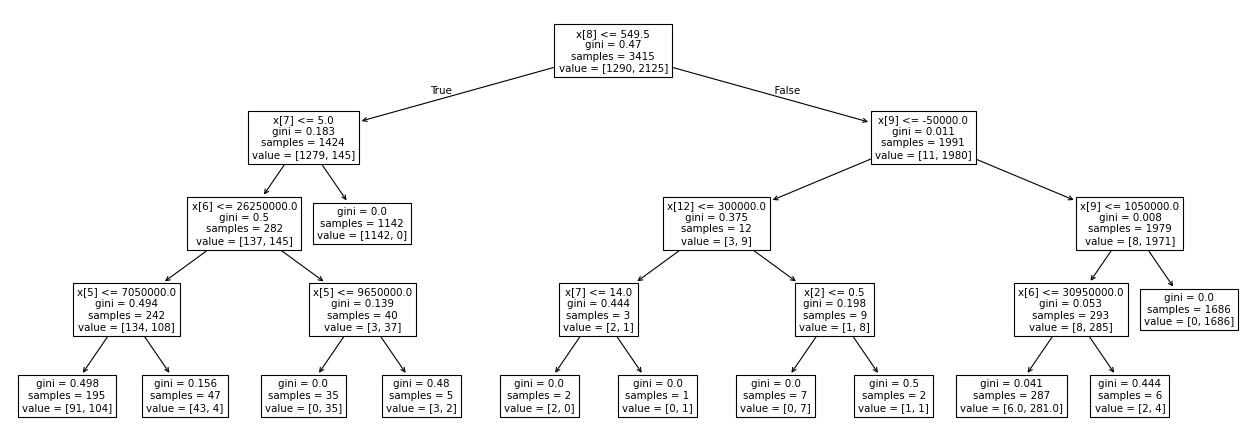

In [13]:
plt.figure(figsize=(20, 7), dpi=80)
plot_tree(tree_d4["decisiontreeclassifier"])
print()

In [14]:
m = tree_d4["decisiontreeclassifier"]
print(m.tree_.n_leaves,m.tree_.node_count,m.get_depth())

12 23 4


It's a pretty simple model in my opinion

# Task 2 (Impact of model Complexity and Tree Pruning)

## Part A (Training a Tree without Depth Limit)

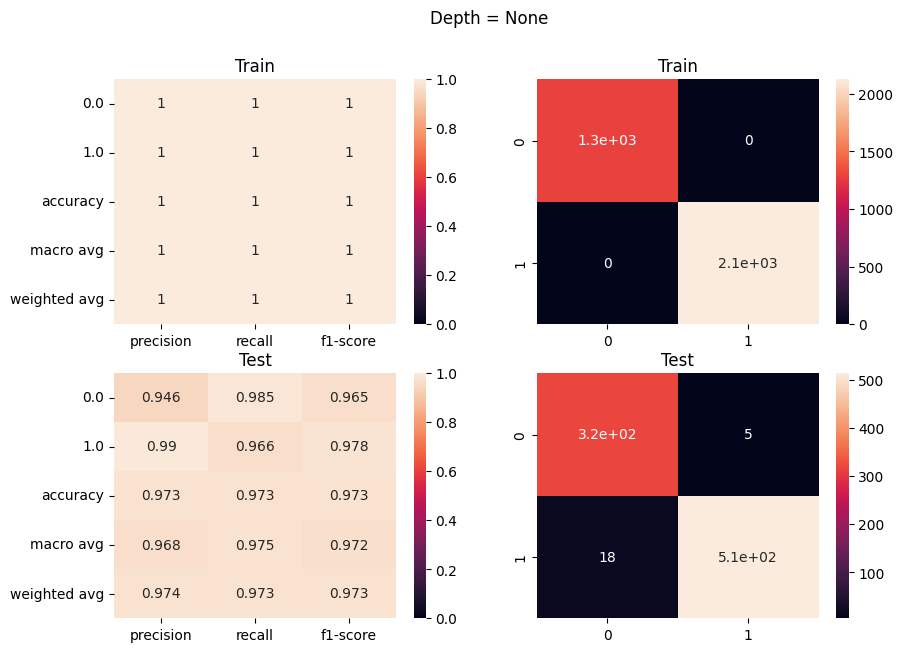

In [15]:
tree_dn = make_pipeline(prep, DecisionTreeClassifier(max_depth=None, random_state=7)).fit(X_train,y_train)
validate_model(tree_dn, "Depth = None")

In [16]:
m = tree_dn["decisiontreeclassifier"]
print(m.tree_.n_leaves,m.tree_.node_count,m.get_depth())

61 121 17


Ladies and gentlemen! What you are watching is overfitting.

## Part B (Checking Different Depths)

In [17]:
trees = [None] # Do not remove this None!
for i in range(1,18):
    trees.append(make_pipeline(prep, DecisionTreeClassifier(max_depth=i, random_state=7)).fit(X_train,y_train))

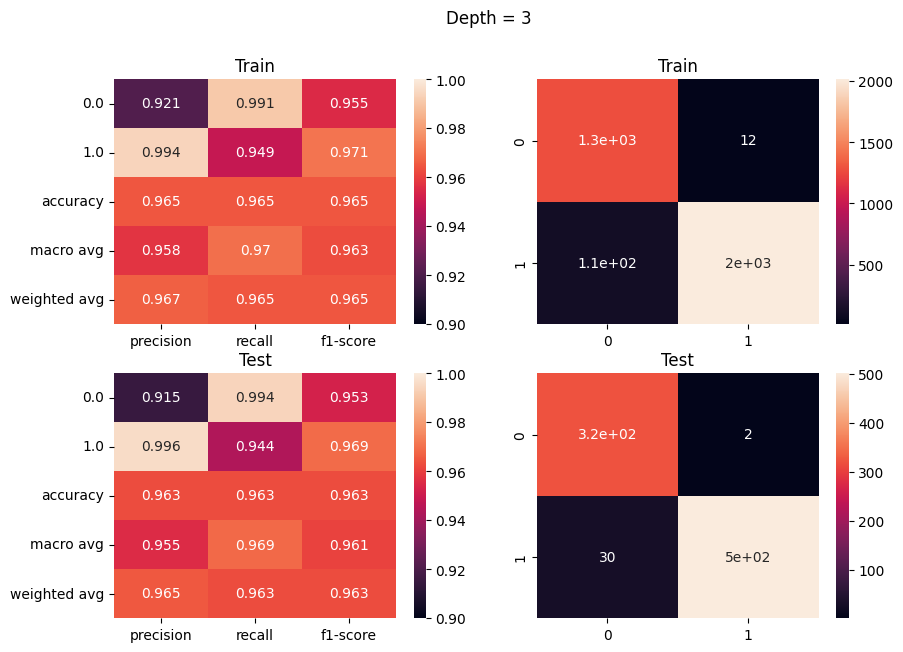

In [18]:
i = 3; validate_model(trees[i], f"Depth = {i}", vmin =0.9)

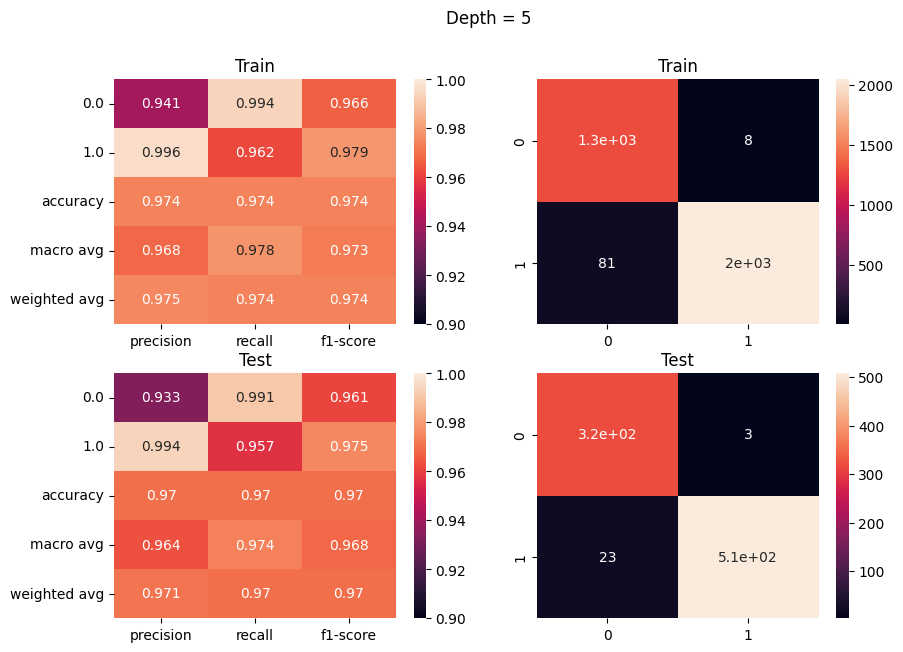

In [19]:
i = 5; validate_model(trees[i], f"Depth = {i}", vmin =0.9)

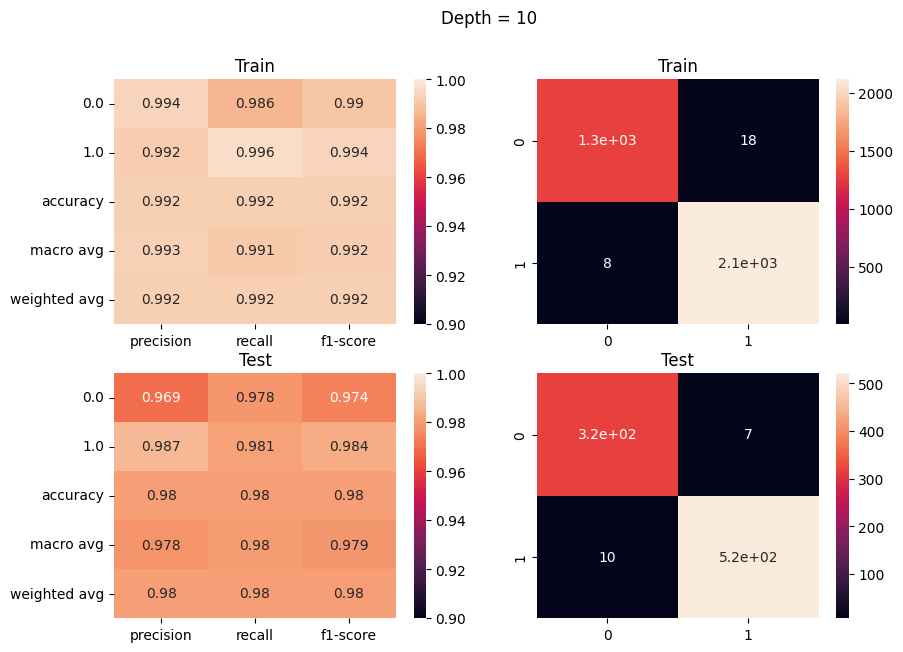

In [20]:
i = 10; validate_model(trees[i], f"Depth = {i}", vmin =0.9)

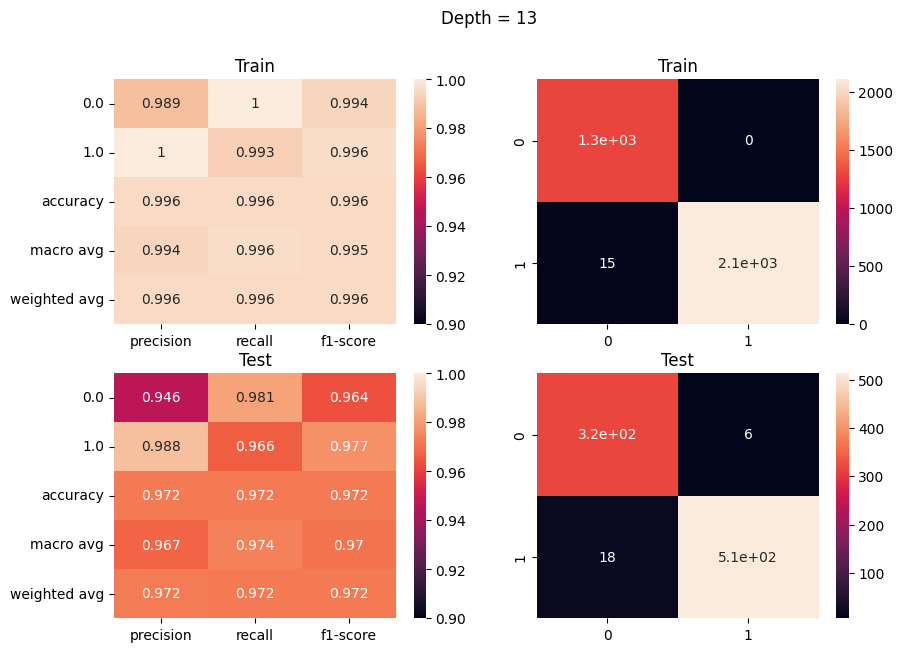

In [21]:
i = 13; validate_model(trees[i], f"Depth = {i}", vmin =0.9)

In [22]:
res = pd.DataFrame(columns=["f1 score train","f1 score test"])

for i, tree in enumerate(trees):
    if tree == None: continue 
    res.loc[i] = [classification_report(y_train,tree.predict(X_train), output_dict=True)['weighted avg']["f1-score"],
                  classification_report(y_test,tree.predict(X_test), output_dict=True)['weighted avg']["f1-score"]]

Text(0.5, 0, 'depth')

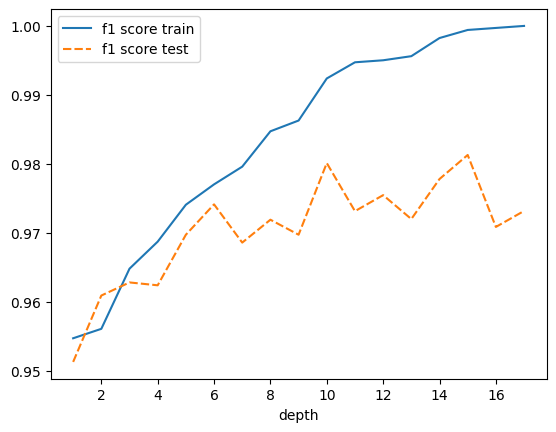

In [23]:
sb.lineplot(res)
plt.xlabel("depth")

In the beginning the model is very simple (underfit) and at the end the model is too complex (overfit)

## Part C (Cost Complexity Pruning)

Text(0.5, 0, 'alpha')

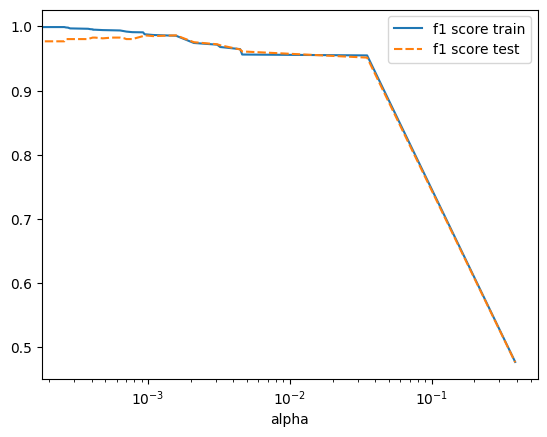

In [83]:
import warnings
warnings.filterwarnings("ignore")

def ccpFunc(base_model, max_depth = None):

    ccp_alphas, impurities = base_model['decisiontreeclassifier'].cost_complexity_pruning_path(X_train_prep,y_train).values()

    res = pd.DataFrame(columns=["f1 score train","f1 score test","depth","node count"])
    for ccp_alpha in ccp_alphas:
        clf = make_pipeline(prep, DecisionTreeClassifier(random_state=7, ccp_alpha=ccp_alpha, max_depth=max_depth))
        clf.fit(X_train, y_train)
        res.loc[ccp_alpha] = [classification_report(y_train,clf.predict(X_train), output_dict=True)['weighted avg']["f1-score"],
                      classification_report(y_test,clf.predict(X_test), output_dict=True)['weighted avg']["f1-score"],
                      clf['decisiontreeclassifier'].get_depth(),
                      clf['decisiontreeclassifier'].tree_.node_count]
    return res
res = ccpFunc(tree_dn)
sb.lineplot(res[["f1 score train","f1 score test"]]).set_xscale('log')
plt.xlabel("alpha")

Text(0.5, 0, 'alpha')

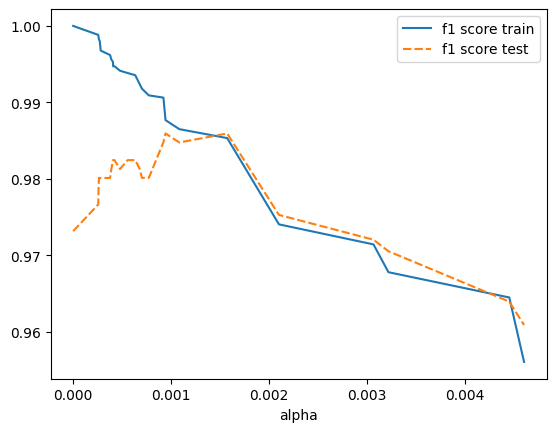

In [84]:
sb.lineplot(res[["f1 score train","f1 score test"]].head(28))
plt.xlabel("alpha")

Text(0.5, 0, 'alpha')

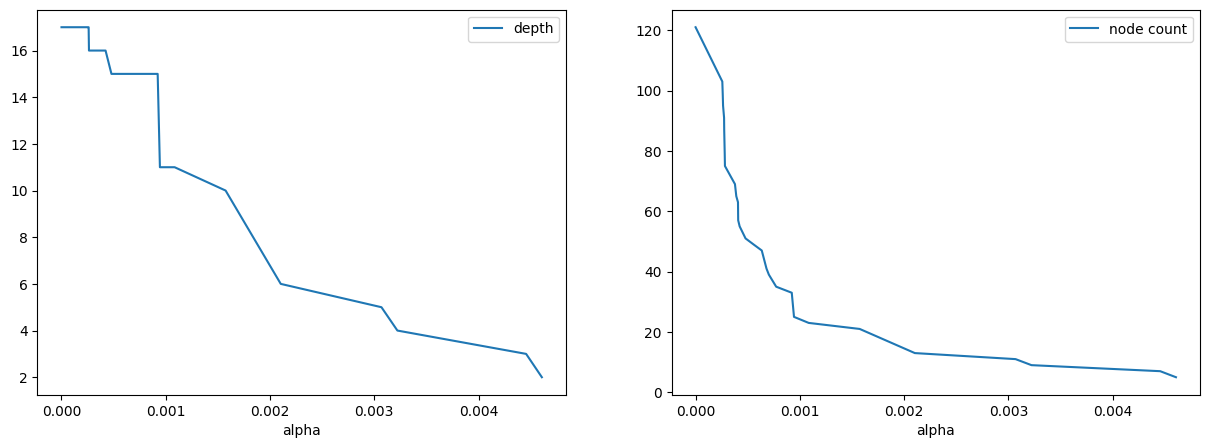

In [71]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sb.lineplot(res[["depth"]].head(28),ax=ax[0]).set_xlabel("alpha")
sb.lineplot(res[["node count"]].head(28),ax=ax[1]).set_xlabel("alpha")

![](pic/matrix_tree.png)

In [72]:
res.iloc[27]

f1 score train    0.956072
f1 score test     0.960900
depth             2.000000
node count        5.000000
Name: 0.004607091958293133, dtype: float64

In [73]:
res.iloc[22]

f1 score train     0.985336
f1 score test      0.985940
depth             10.000000
node count        21.000000
Name: 0.001573972242276215, dtype: float64

You have two options: 

-  A super simple tree with only 5 nodes which is easy to understand!
-  A bigger tree which is more complex but gives high performance in prediction!

I would choose the simple one!

[Text(0.6, 0.8333333333333334, 'cibil_score <= 549.5\ngini = 0.47\nsamples = 3415\nvalue = [1290, 2125]\nclass = y[1]'),
 Text(0.4, 0.5, 'loan_term <= 5.0\ngini = 0.183\nsamples = 1424\nvalue = [1279, 145]\nclass = y[0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.5\nsamples = 282\nvalue = [137, 145]\nclass = y[1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 1142\nvalue = [1142, 0]\nclass = y[0]'),
 Text(0.8, 0.5, 'gini = 0.011\nsamples = 1991\nvalue = [11, 1980]\nclass = y[1]'),
 Text(0.7, 0.6666666666666667, '  False')]

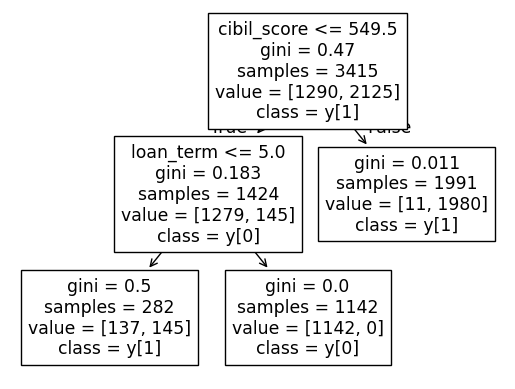

In [121]:
best_ccp = make_pipeline(prep,DecisionTreeClassifier(random_state=7,ccp_alpha=0.004607091958293133)).fit(X_train,y_train)
plot_tree(best_ccp['decisiontreeclassifier'], feature_names=best_ccp[:-1].get_feature_names_out(), class_names=True)

[Text(0.8461538461538461, 0.9545454545454546, 'cibil_score <= 549.5\ngini = 0.47\nsamples = 3415\nvalue = [1290, 2125]\nclass = y[1]'),
 Text(0.7692307692307693, 0.8636363636363636, 'loan_term <= 5.0\ngini = 0.183\nsamples = 1424\nvalue = [1279, 145]\nclass = y[0]'),
 Text(0.8076923076923077, 0.9090909090909092, 'True  '),
 Text(0.6923076923076923, 0.7727272727272727, 'loan_amount <= 26250000.0\ngini = 0.5\nsamples = 282\nvalue = [137, 145]\nclass = y[1]'),
 Text(0.6153846153846154, 0.6818181818181818, 'income_annum <= 7050000.0\ngini = 0.494\nsamples = 242\nvalue = [134, 108]\nclass = y[0]'),
 Text(0.5384615384615384, 0.5909090909090909, 'loan_amount <= 18400000.0\ngini = 0.498\nsamples = 195\nvalue = [91, 104]\nclass = y[1]'),
 Text(0.46153846153846156, 0.5, 'income_annum <= 5800000.0\ngini = 0.498\nsamples = 169\nvalue = [90.0, 79.0]\nclass = y[0]'),
 Text(0.38461538461538464, 0.4090909090909091, 'loan_amount <= 15000000.0\ngini = 0.498\nsamples = 148\nvalue = [69, 79]\nclass = y[1]

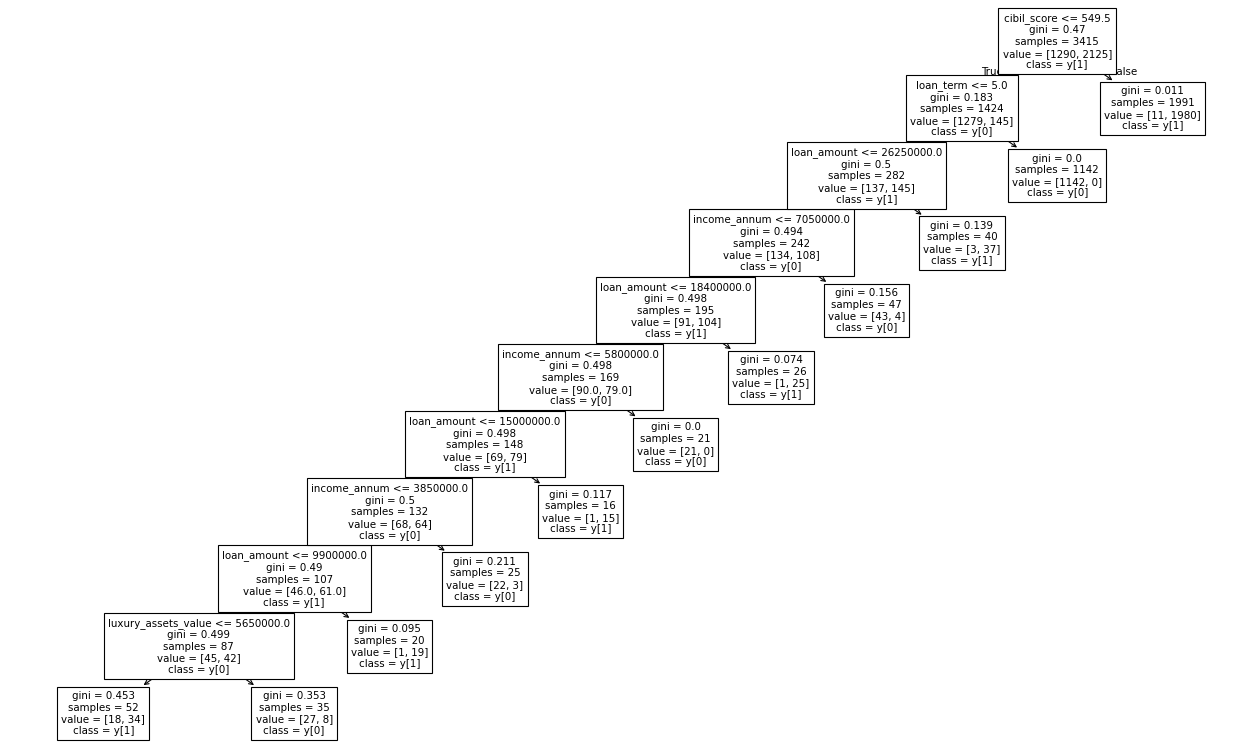

In [124]:
plt.figure(figsize=(20, 12), dpi=80)
complex_ccp = make_pipeline(prep,DecisionTreeClassifier(random_state=7,ccp_alpha=0.001573972242276215)).fit(X_train,y_train)
plot_tree(complex_ccp['decisiontreeclassifier'], feature_names=complex_ccp[:-1].get_feature_names_out(), class_names=True)

what the fuck is this!?